<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Gathering-data" data-toc-modified-id="Gathering-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Gathering data</a></span></li><li><span><a href="#Preparing-the-data---cleaning-and-exploration" data-toc-modified-id="Preparing-the-data---cleaning-and-exploration-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Preparing the data - cleaning and exploration</a></span><ul class="toc-item"><li><span><a href="#Title-column" data-toc-modified-id="Title-column-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Title column</a></span></li><li><span><a href="#Age-column" data-toc-modified-id="Age-column-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Age column</a></span></li><li><span><a href="#Fare-column" data-toc-modified-id="Fare-column-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Fare column</a></span></li><li><span><a href="#Sex-column" data-toc-modified-id="Sex-column-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Sex column</a></span></li><li><span><a href="#Embarked-column" data-toc-modified-id="Embarked-column-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Embarked column</a></span></li><li><span><a href="#FamilySize-and-IsAlone-columns" data-toc-modified-id="FamilySize-and-IsAlone-columns-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>FamilySize and IsAlone columns</a></span></li><li><span><a href="#Cabin-column" data-toc-modified-id="Cabin-column-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Cabin column</a></span></li><li><span><a href="#Other-columns" data-toc-modified-id="Other-columns-2.8"><span class="toc-item-num">2.8&nbsp;&nbsp;</span>Other columns</a></span></li><li><span><a href="#Select-features" data-toc-modified-id="Select-features-2.9"><span class="toc-item-num">2.9&nbsp;&nbsp;</span>Select features</a></span></li></ul></li><li><span><a href="#Choosing-a-model" data-toc-modified-id="Choosing-a-model-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Choosing a model</a></span></li><li><span><a href="#Training-models" data-toc-modified-id="Training-models-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Training models</a></span></li><li><span><a href="#Evaluating-models" data-toc-modified-id="Evaluating-models-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Evaluating models</a></span></li><li><span><a href="#Hyperparameter-Tuning" data-toc-modified-id="Hyperparameter-Tuning-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Hyperparameter Tuning</a></span><ul class="toc-item"><li><span><a href="#Tuning-with-RandomizedSearchCV" data-toc-modified-id="Tuning-with-RandomizedSearchCV-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Tuning with RandomizedSearchCV</a></span></li><li><span><a href="#Tuning-with-GridSearchCV" data-toc-modified-id="Tuning-with-GridSearchCV-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Tuning with GridSearchCV</a></span><ul class="toc-item"><li><span><a href="#GradientBoostingClassifier" data-toc-modified-id="GradientBoostingClassifier-6.2.1"><span class="toc-item-num">6.2.1&nbsp;&nbsp;</span>GradientBoostingClassifier</a></span></li><li><span><a href="#XGBClassifier" data-toc-modified-id="XGBClassifier-6.2.2"><span class="toc-item-num">6.2.2&nbsp;&nbsp;</span>XGBClassifier</a></span></li><li><span><a href="#RandomForestClassifier" data-toc-modified-id="RandomForestClassifier-6.2.3"><span class="toc-item-num">6.2.3&nbsp;&nbsp;</span>RandomForestClassifier</a></span></li></ul></li></ul></li><li><span><a href="#Making-Predictions" data-toc-modified-id="Making-Predictions-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Making Predictions</a></span></li></ul></div>


# **Introduction**

The notebook contains a complete exploration of the Titanic dataset and modeling it with different models and also exploring the use of H2O for modeling and generating the submission file which is used for Kaggle submission.

## **DataSet**

Download the data from this link and upload it to the run time in Google colab to run the notebook

https://www.kaggle.com/c/titanic/data

# Gathering data

First load the training and test data in two separate DataFrames.

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib.pyplot import plot as plt
%matplotlib inline

In [ ]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
combined = [train_df,test_df]
combined_df = pd.concat(combined, sort=False)

# Preparing the data - cleaning and exploration

Variable Notes
pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.  


Let's have a look at the 5 first rows.

In [ ]:
train_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


And display some statistics about numerical columns.

In [ ]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Let's see how many missing data we have.

In [ ]:
combined_df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

## Title column

Here I will create a function to create a Title column extracted from the Name column, replace some synonyms, and finally change all titles with less than 10 occurences by 'Misc'.

In [ ]:
def create_title_column(dataframe):
    dataframe['Title'] = dataframe['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]
    dataframe['Title'] = dataframe['Title'].replace('Mlle', 'Miss')
    dataframe['Title'] = dataframe['Title'].replace('Ms', 'Miss')
    dataframe['Title'] = dataframe['Title'].replace('Mme', 'Mrs')
    
    stat_min = 10 #while small is arbitrary, we'll use the common minimum in statistics: http://nicholasjjackson.com/2012/03/08/sample-size-is-10-a-magic-number/
    title_names = (dataframe['Title'].value_counts() < stat_min) #this will create a true false series with title name as index
    #apply and lambda functions are quick and dirty code to find and replace with fewer lines of code: https://community.modeanalytics.com/python/tutorial/pandas-groupby-and-python-lambda-functions/
    dataframe['Title'] = dataframe['Title'].apply(lambda x: 'Misc' if title_names.loc[x] == True else x)
    
    return dataframe['Title']

In [ ]:
for df in combined:
    df['Title'] = create_title_column(df)

print(train_df['Title'].value_counts())

Mr        517
Miss      185
Mrs       126
Master     40
Misc       23
Name: Title, dtype: int64


Finally the column is converted as a numerical categorical column (Master=0, Misc=1, Miss=2, Mr=3, Mrs=4).

In [ ]:
for df in combined:
    df['Title'] = pd.Categorical(df['Title']).codes
    
print(train_df['Title'].value_counts())

3    517
2    185
4    126
0     40
1     23
Name: Title, dtype: int64


## Age column

There are 263 persons with missing Age. We'll fill the missing values with some mean...  
But let's first explore how the age is distributed across Pclass and if there's any difference between male and female:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


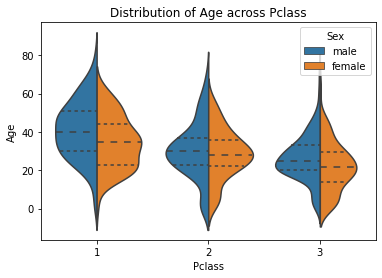

In [ ]:
plot = sns.violinplot('Pclass', 'Age', data=train_df, inner='quartile', hue='Sex', split=True)
plot_title = plot.set_title('Distribution of Age across Pclass')

The higher the Pclass, the higher the age. But there's no big difference between male and female.  
So we'll replace missing values with the mean age of the appropriate Pclass.

In [ ]:
mean_age_by_pclass = combined_df.groupby('Pclass').mean()['Age']
mean_age_by_pclass

Pclass
1    39.159930
2    29.506705
3    24.816367
Name: Age, dtype: float64

In [ ]:
def compute_age(row):
    if pd.isnull(row['Age']):
        return mean_age_by_pclass[row['Pclass']]
    return row['Age']

In [ ]:
for df in combined:
    df["Age"] = df.apply(compute_age, axis=1)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


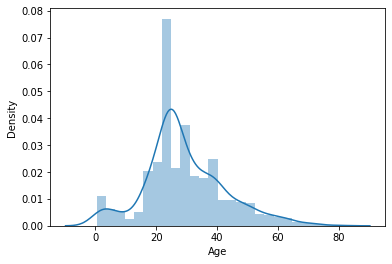

In [ ]:
sns.distplot(train_df['Age'])

Continuous values like Age are usually more difficult from predictive modeling point of view.  
So we will convert the column to bins.  
But before we do that, we create a new column that will inform us if a given person is a child or not: _women and children first_.

In [ ]:
for df in combined:
    df['IsChild'] = df['Age']<15

In [ ]:
def get_quantile_based_boundaries(feature_values, num_buckets):
  boundaries = np.arange(1.0, num_buckets) / num_buckets
  quantiles = feature_values.quantile(boundaries)
  return [quantiles[q] for q in quantiles.keys()]

In [ ]:
def compute_band(row, column_name, boundaries):
    i=0
    for boundary in boundaries:
        if row[column_name] < boundary:
            return i
        i=i+1
    return len(boundaries)

As I don't know yet how many bins I want, I'll create multiple columns with different bins size.

In [ ]:
for i in np.arange(3, 6):
    age_boundaries = get_quantile_based_boundaries(combined_df.Age, i)
    for df in combined:
        df["Age_band_" + str(i)] = df.apply(lambda row : compute_band(row, 'Age', age_boundaries), axis=1)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


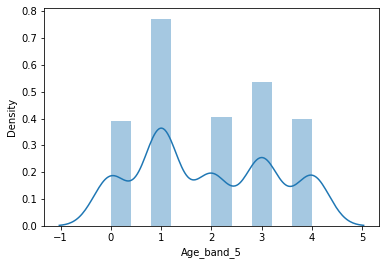

In [ ]:
sns.distplot(train_df.Age_band_5)

## Fare column

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


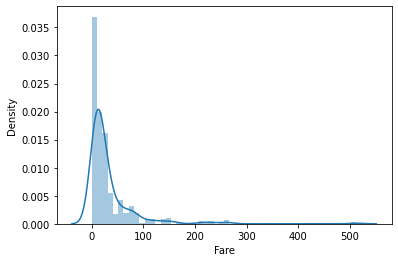

In [ ]:
sns.distplot(train_df.Fare)

There's one missing fare, so we'll fill it with the mean fare given Pclass. 

In [ ]:
missing_fare = test_df[test_df['Fare'].isna()]
missing_fare

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,IsChild,Age_band_3,Age_band_4,Age_band_5
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,3,False,2,3,4


In [ ]:
fare_groupby_pclass = combined_df.groupby('Pclass').mean()['Fare']
fare_groupby_pclass

Pclass
1    87.508992
2    21.179196
3    13.302889
Name: Fare, dtype: float64

In [ ]:
mean_fare_for_Pclass3 = fare_groupby_pclass.loc[missing_fare.iloc[0].Pclass]
test_df['Fare'].fillna(mean_fare_for_Pclass3, inplace=True)

For the same reason than Agen, we will create 5 bands of Fare.

In [ ]:
for i in np.arange(3, 6):
    fare_boundaries = get_quantile_based_boundaries(combined_df.Fare, i)
    for df in combined:
        df["Fare_band_" + str(i)] = df.apply(lambda row : compute_band(row, 'Fare', fare_boundaries), axis=1)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


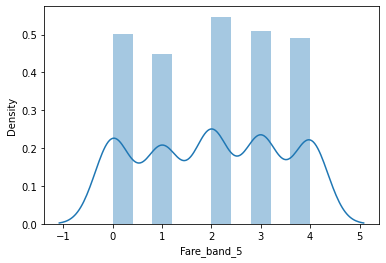

In [ ]:
sns.distplot(train_df.Fare_band_5)

## Sex column

Let's convert the Sex column to be numerical.

In [ ]:
train_df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [ ]:
for df in combined:
    df.Sex = pd.get_dummies(df.Sex, drop_first=True)

In [ ]:
train_df.Sex.value_counts()

1    577
0    314
Name: Sex, dtype: int64

## Embarked column

First fill empty values with the most frequent embarked.  
Then convert the column to be numerical.

In [ ]:
train_df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
freq_port = df.Embarked.dropna().mode()[0]

for df in combined:
    df.Embarked.fillna(freq_port, inplace=True)
    df.Embarked = pd.Categorical(df.Embarked).codes

In [ ]:
train_df.Embarked.value_counts()

2    646
0    168
1     77
Name: Embarked, dtype: int64

## FamilySize and IsAlone columns

Let's create two new columns:
- FamilySize is the sum of SibSp and Parch + 1 (the person itself)
- IsAlone: whether this person has embarked alone or with his family

In [ ]:
for df in combined:
    df['FamilySize'] = df.SibSp + df.Parch + 1
    df['IsAlone'] = ((df.SibSp + df.Parch)==0)*1

## Cabin column

Here I will extract some information that may be intersting from the Cabin column: the letter of the cabin, its number, and whether it's odd or not.

In [ ]:
import re
def extract_cabin_nr(cabin):
    """ Extracts the cabin number.  If there no number found, return NaN """
    if not pd.isnull(cabin):
        cabin = cabin.split(' ')[-1]    # if several cabins on ticket, take last one
        re_numb = r'[A-Z]([0-9]+)'
        try:
            number = int(re.findall(re_numb, cabin)[0])
            return number
        except:
            return np.nan
    else:
        return np.nan

In [ ]:
def extract_cabin_letter(cabin):
    """ Extracts the cabin letter.  If there no letter found, return NaN """
    if not pd.isnull(cabin):
        cabin = cabin.split(' ')[-1]    # if several cabins on ticket, take last one
        re_char = r'([A-Z])[0-9]+'
        try:
            character = re.findall(re_char, cabin)[0]
            return character
        except:
            return np.nan
    else:
        return np.nan

In [ ]:
for df in combined:
    df['Cabin_char'] = list(map(extract_cabin_letter, df['Cabin']))
    df['Cabin_nr'] = list(map(extract_cabin_nr, df['Cabin']))
    df['Cabin_nr_odd'] = df.Cabin_nr.apply(lambda x: np.nan if x == np.nan else x%2)
    
    # deal with the NaN's in some of our newly created columns
    df['Cabin_char'].fillna(value=-9999, inplace=True)
    df['Cabin_nr'].fillna(value=-9999, inplace=True)
    df['Cabin_nr_odd'].fillna(value=-9999, inplace=True)

## Other columns
Let's drop the columns we don't need anymore.

In [ ]:
train_df = train_df.drop(['Name','Cabin','Ticket','Fare','Age'], 1)

In [ ]:
train_df = pd.get_dummies(train_df, drop_first=True)
train_df.describe()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,Title,Age_band_3,Age_band_4,Age_band_5,Fare_band_3,Fare_band_4,Fare_band_5,FamilySize,IsAlone,Cabin_nr,Cabin_nr_odd,Cabin_char_A,Cabin_char_B,Cabin_char_C,Cabin_char_D,Cabin_char_E,Cabin_char_F,Cabin_char_G
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.00000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,0.523008,0.381594,1.536476,2.747475,1.056117,1.499439,1.912458,1.034792,1.547699,2.015713,1.904602,0.602694,-7743.141414,-7754.454545,0.016835,0.052750,0.066218,0.03367,0.037037,0.010101,0.007856
std,257.353842,0.486592,0.836071,0.477990,1.102743,0.806057,0.791503,0.890765,0.756392,1.058274,1.333733,0.834590,1.078244,1.405359,1.613459,0.489615,4195.494912,4174.421322,0.128725,0.223659,0.248802,0.18048,0.188959,0.100051,0.088337
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-9999.000000,-9999.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,-9999.000000,-9999.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,1.000000,0.000000,0.000000,2.000000,3.000000,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000,-9999.000000,-9999.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,668.500000,1.000000,3.000000,1.000000,1.000000,0.000000,2.000000,3.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000,2.000000,1.000000,-9999.000000,-9999.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
max,891.000000,1.000000,3.000000,1.000000,8.000000,6.000000,2.000000,4.000000,2.000000,3.000000,4.000000,2.000000,3.000000,4.000000,11.000000,1.000000,148.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


## Select features

I have tried many different selection of features in the models I tested.  
I also explored Feature ranking with recursive feature elimination and cross-validated selection of the best number of features with [RFECV](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html).  
I finally selected a mix between my feeling and what RFECV has proposed.

In [ ]:
X = np.array(train_df.drop(['Survived','PassengerId'], 1))
training_features = np.array(train_df.drop(['Survived','PassengerId'], 1).columns)
y = np.array(train_df['Survived'])

I need my first classifier to explorer feature ranking.  
Machine learning is an iterative process so here I'll use the classifier that I used for my the best submission: [XGBClassifier](https://xgboost.readthedocs.io/en/latest/python/python_api.html)

In [ ]:
from sklearn import model_selection
import xgboost as xgb

clf = xgb.XGBClassifier(verbose=1)
#for i in np.arange(3, 21):
cv = model_selection.StratifiedKFold(n_splits=6, shuffle=True, random_state=1)
scores = model_selection.cross_val_score(clf, X, y, cv=cv, n_jobs=-1, scoring='accuracy', verbose=1)
clf.fit(X,y)
print('n_split=' + str(i))
print(scores)
print('Accuracy: %.3f stdev: %.3f' % (np.mean(np.abs(scores)), np.std(scores)))
print()


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


n_split=5
[0.81208054 0.83892617 0.83221477 0.7972973  0.84459459 0.86486486]
Accuracy: 0.832 stdev: 0.022



[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    1.6s finished


In [ ]:
from sklearn.feature_selection import RFECV

print("features used during training: ")
print(training_features)
print("")

featselect = RFECV(estimator=clf, cv=cv, scoring='accuracy', verbose=1, n_jobs=-1)
featselect.fit(X,y)

print("features proposed by RFECV: "),
print(training_features[featselect.support_])

features used during training: 
['Pclass' 'Sex' 'SibSp' 'Parch' 'Embarked' 'Title' 'IsChild' 'Age_band_3'
 'Age_band_4' 'Age_band_5' 'Fare_band_3' 'Fare_band_4' 'Fare_band_5'
 'FamilySize' 'IsAlone' 'Cabin_nr' 'Cabin_nr_odd' 'Cabin_char_A'
 'Cabin_char_B' 'Cabin_char_C' 'Cabin_char_D' 'Cabin_char_E'
 'Cabin_char_F' 'Cabin_char_G']

Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
features proposed by RFECV: 
['Pclass' 'Sex' 'SibSp' 'Parch' 'Embarked' 'Title' 'IsChild' 'Age_band_3'
 'Age_band_4' 'Age_band_5' 'Fare_band_3' 'Fare_band_4' 'Fare_band_5'
 'FamilySize' 'Cabin_nr' 'Cabin_nr_odd' 'Cabin_char_B' 'Cabin_char_C'
 'Cabin_char_E']


In [ ]:
#features = ['Pclass', 'Sex', 'Age', 'IsAlone', 'Fare', 'Embarked', 'Title', 'Cabin_nr']
features = ['Pclass','Sex', 'IsChild', 'Age_band_5', 'Fare_band_4', 'Fare_band_5', 'Title', 'FamilySize', 'Cabin_nr']

# Choosing a model

The goal of this project is to have a first real experience in machine learning, python, sklearn and try many different classifiers.  
So let's create an algorithm that will try many different classifiers, and try many different hyper parameters thanks to [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).  
This algorithm will also record the scores and best parameters for every classifier.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.metrics import make_scorer, accuracy_score, f1_score
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier

Here are the hyper parameters and their tested values:

In [ ]:
n_estimators = [10,50,100,200,400]
n_neighbors = [3,4,5,6]
learning_rates = [1.0, 0.3, 0.1, 0.03, 0.01, 0.005, 0.003]
criterion = ['gini', 'entropy']
max_features = ['log2', 'sqrt','auto']
hidden_layer_sizes = [(100,), (100,100), (50,100,50)]
C = [0.1, 1, 3, 10, 30, 100]
gamma = [1, 0.3, 0.1, 0.03, 0.01, 0.001]
max_depth = [2, 3, 4]
reg_lambda = [0.50]
loss = ['deviance', 'exponential']

And the many classifiers I give a try with their hyper parameters:

In [ ]:
models_and_grid_params = [
    #(SGDClassifier, {'penalty': ['l2', 'l1']}),
    (xgb.XGBClassifier, {'n_estimators': n_estimators, 'learning_rate': learning_rates, 'max_depth': max_depth, 'reg_lambda': reg_lambda}),
    (AdaBoostClassifier, {'n_estimators': n_estimators, 'learning_rate': learning_rates}),
    #(ExtraTreesClassifier, {'n_estimators': n_estimators}),
    (GradientBoostingClassifier,{'loss': loss, 'learning_rate': learning_rates}), 
    (RandomForestClassifier, {'n_estimators': n_estimators, 'criterion': criterion,'max_features': max_features}),
    #(KNeighborsClassifier, {'n_neighbors': n_neighbors}),
    #(MLPClassifier,{'hidden_layer_sizes': hidden_layer_sizes}),
                   #(SVC,{'C': C, 'gamma': gamma}),
                   #(GaussianProcessClassifier,{}),
                   (DecisionTreeClassifier,{})
                   #(GaussianNB,{})
                   ]

scores = pd.DataFrame(columns=['Model', 'Estimator', 'Trial', 'Best Params', 'Accuracy Score'])

# Training models

Here I split training data into random train (60%) and test subsets (40%). The test subset will be used to evaluate how the classifier can generalize with unseen data.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train_df[features], train_df['Survived'], test_size=0.4, random_state=42)

Define train_model function that will create a given model, and search for the best parameters across a given param_grid.
It appends the results to the scores dataframe for later evaluation.

In [ ]:
def train_model(estimator_class, param_grid, scores, X_train, X_test, y_train, y_test, verbose=0):
    estimator = estimator_class()
    
    if verbose==1:
        print('Training ' + type(estimator).__name__ + '...')
    
    
    cv = model_selection.StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

    model = GridSearchCV(estimator, param_grid, refit=True, cv=cv, scoring='accuracy', verbose=verbose, n_jobs=-1)
    model.fit(X_train,y_train)
    #pred = model.predict(X_test)
    
    #accuracy = round(model.score(X_test, y_test) * 100, 3)
    trial_row = scores[scores['Model']==type(estimator).__name__]
    trial = 1
    if not trial_row.empty:
        trial = int(trial_row['Trial'].max()) + 1
    scores = scores.append({'Model' : type(estimator).__name__, 
                            'Estimator' : model.best_estimator_, 
                            'Trial': trial,
                            'Best Params': str(model.best_params_),
                            'Accuracy Score': round(model.best_score_*100,3) #accuracy
                           }, ignore_index=True)
    
    return scores, model.best_estimator_, model.best_params_, round(model.best_score_*100,3)

In [ ]:
def print_results(model, params, accuracy, scores=None):
    print(type(model).__name__ + ' works best (' + str(accuracy) + '%) with ' + str(params))
    if not scores is None:
        scores = scores.sort_values('Accuracy Score', ascending=False)
    return scores

Now let's train all the models:

In [ ]:
for model_class, param_grid in models_and_grid_params:
    scores, best_model, best_params, accuracy = train_model(model_class, param_grid, scores, X_train, X_test, y_train, y_test, verbose=1)
    print_results(best_model, best_params, accuracy)

Training XGBClassifier...
Fitting 5 folds for each of 105 candidates, totalling 525 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 164 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 525 out of 525 | elapsed:   18.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


XGBClassifier works best (85.399%) with {'learning_rate': 0.3, 'max_depth': 3, 'n_estimators': 10, 'reg_lambda': 0.5}
Training AdaBoostClassifier...
Fitting 5 folds for each of 35 candidates, totalling 175 fits


[Parallel(n_jobs=-1)]: Done  60 tasks      | elapsed:   11.7s
[Parallel(n_jobs=-1)]: Done 175 out of 175 | elapsed:   39.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


AdaBoostClassifier works best (83.715%) with {'learning_rate': 0.1, 'n_estimators': 100}
Training GradientBoostingClassifier...
Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    4.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


GradientBoostingClassifier works best (84.835%) with {'learning_rate': 0.03, 'loss': 'exponential'}
Training RandomForestClassifier...
Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  84 tasks      | elapsed:   14.9s


RandomForestClassifier works best (83.146%) with {'criterion': 'gini', 'max_features': 'log2', 'n_estimators': 50}
Training DecisionTreeClassifier...
Fitting 5 folds for each of 1 candidates, totalling 5 fits
DecisionTreeClassifier works best (81.46%) with {}


[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   29.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished


# Evaluating models

The dataframe below shows the best results for the trained models, with the highest score on top.

In [ ]:
def print_scores(scores):
    return scores.sort_values('Accuracy Score', ascending=False)

In [ ]:
print_scores(scores)

,Model,Estimator,Trial,Best Params,Accuracy Score
0,XGBClassifier,"XGBClassifier(base_score=0.5, booster='gbtree'...",1,"{'learning_rate': 0.3, 'max_depth': 3, 'n_esti...",85.399
2,GradientBoostingClassifier,"([DecisionTreeRegressor(ccp_alpha=0.0, criteri...",1,"{'learning_rate': 0.03, 'loss': 'exponential'}",84.835
1,AdaBoostClassifier,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",1,"{'learning_rate': 0.1, 'n_estimators': 100}",83.715
3,RandomForestClassifier,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",1,"{'criterion': 'gini', 'max_features': 'log2', ...",83.146
4,DecisionTreeClassifier,"DecisionTreeClassifier(ccp_alpha=0.0, class_we...",1,{},81.460


# Hyperparameter Tuning

## Tuning with RandomizedSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1900, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
criterion = ['gini', 'entropy']

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'criterion': criterion,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'criterion': ['gini', 'entropy'],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100, 300, 500, 700, 900, 1100, 1300, 1500, 1700, 1900]}


In [ ]:
rf_random = RandomizedSearchCV(estimator = RandomForestClassifier(), param_distributions = random_grid, n_iter = 200, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 200 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   44.2s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed: 10.6min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [ ]:
print('The best parameters after tuning are: ')
print()
pprint(rf_random.best_params_)

print()
best_model = rf_random.best_estimator_
old_score = float(scores[scores['Model']==type(best_model).__name__]['Accuracy Score'])
rf_random_score = round(best_model.score(X_test, y_test) * 100, 2)
print('Final Score on validation data: ' + str(rf_random_score) + '% (+' + str(round(rf_random_score-old_score,2)) + '%)')

The best parameters after tuning are: 

{'bootstrap': False,
 'criterion': 'entropy',
 'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 1100}

Final Score on validation data: 83.47% (+0.32%)


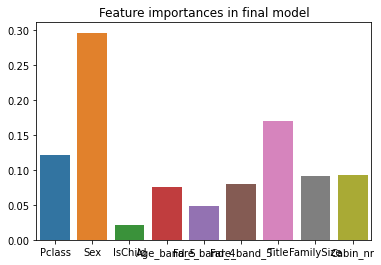

In [ ]:
feature_importances_df = pd.DataFrame(best_model.feature_importances_).transpose()
feature_importances_df.columns = features
axes = sns.barplot(data=feature_importances_df)
_ = axes.set_title('Feature importances in final model')

## Tuning with GridSearchCV

### GradientBoostingClassifier

In [ ]:
learning_rates = [0.12, 0.11, 0.1, 0.09, 0.08]
max_depth = [3,5,8]
loss = ['deviance', 'exponential']

tuned_param_grid = {'learning_rate': learning_rates, 'loss': loss, 'max_depth': max_depth,
    "min_samples_split": np.linspace(0.1, 0.5, 6),
    "min_samples_leaf": np.linspace(0.1, 0.5, 6),
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mae"]}


In [ ]:
scores, gb_tuned, gb_tuned_params, gb_accuracy = train_model(GradientBoostingClassifier, tuned_param_grid, scores, X_train, X_test, y_train, y_test, verbose=1)

Training GradientBoostingClassifier...
Fitting 5 folds for each of 4320 candidates, totalling 21600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 388 tasks      | elapsed:   16.0s
[Parallel(n_jobs=-1)]: Done 888 tasks      | elapsed:   36.5s
[Parallel(n_jobs=-1)]: Done 1588 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 2488 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 3588 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 4888 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 6388 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 8088 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 9988 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 12088 tasks      | elapsed:  9.4min
[Parallel(n_jobs=-1)]: Done 14388 tasks      | elapsed: 12.9min
[Parallel(n_jobs=-1)]: Done 16888 tasks      | elapsed: 16.8min
[Parallel(n_jobs=-1)]: Done 19588 tasks      | elapsed: 20.9min
[Parallel(n_jobs=-1)]: Done 21600 out of 

In [ ]:
print_results(gb_tuned, gb_tuned_params, gb_accuracy, scores)

GradientBoostingClassifier works best (83.532%) with {'criterion': 'friedman_mse', 'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 8, 'max_features': 'log2', 'min_samples_leaf': 0.1, 'min_samples_split': 0.26}


,Model,Estimator,Trial,Best Params,Accuracy Score
0,XGBClassifier,"XGBClassifier(base_score=0.5, booster='gbtree'...",1,"{'learning_rate': 0.3, 'max_depth': 3, 'n_esti...",85.399
2,GradientBoostingClassifier,"([DecisionTreeRegressor(ccp_alpha=0.0, criteri...",1,"{'learning_rate': 0.03, 'loss': 'exponential'}",84.835
1,AdaBoostClassifier,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",1,"{'learning_rate': 0.1, 'n_estimators': 100}",83.715
5,GradientBoostingClassifier,"([DecisionTreeRegressor(ccp_alpha=0.0, criteri...",2,"{'criterion': 'friedman_mse', 'learning_rate':...",83.532
3,RandomForestClassifier,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",1,"{'criterion': 'gini', 'max_features': 'log2', ...",83.146
4,DecisionTreeClassifier,"DecisionTreeClassifier(ccp_alpha=0.0, class_we...",1,{},81.460


### XGBClassifier

In [ ]:
n_estimators = [8,10,11,12,13,14] #,100,200]
learning_rates = [0.3, 0.25, 0.2, 0.15, 0.1] #, 0.05, 0.03]
max_depth = [3]
reg_lambda = [.43, .44, .45, .46,.47, .48]
colsample_bytree = [.8, .9, 1]
reg_alpha = [0] #, 1e-06, 1e-07] #, 0.002, 0.003] #, 0.004, 0.005, 0.01]
booster = ['gbtree'] #, 'gblinear', 'dart']

tuned_param_grid = {'n_estimators': n_estimators, 'learning_rate': learning_rates, 'max_depth': max_depth, 
                    'reg_lambda': reg_lambda, 'reg_alpha': reg_alpha,
                    'colsample_bytree': colsample_bytree, 'booster': booster
                   }

pprint(tuned_param_grid)

{'booster': ['gbtree'],
 'colsample_bytree': [0.8, 0.9, 1],
 'learning_rate': [0.3, 0.25, 0.2, 0.15, 0.1],
 'max_depth': [3],
 'n_estimators': [8, 10, 11, 12, 13, 14],
 'reg_alpha': [0],
 'reg_lambda': [0.43, 0.44, 0.45, 0.46, 0.47, 0.48]}


In [ ]:
scores, xgb_tuned, xgb_tuned_params, xgb_accuracy = train_model(xgb.XGBClassifier, tuned_param_grid, scores, X_train, X_test, y_train, y_test, verbose=1)

Training XGBClassifier...
Fitting 5 folds for each of 540 candidates, totalling 2700 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 540 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 2700 out of 2700 | elapsed:   20.0s finished


In [ ]:
print_results(xgb_tuned, xgb_tuned_params, xgb_accuracy, scores)

XGBClassifier works best (85.775%) with {'booster': 'gbtree', 'colsample_bytree': 0.8, 'learning_rate': 0.3, 'max_depth': 3, 'n_estimators': 12, 'reg_alpha': 0, 'reg_lambda': 0.46}


,Model,Estimator,Trial,Best Params,Accuracy Score
6,XGBClassifier,"XGBClassifier(base_score=0.5, booster='gbtree'...",2,"{'booster': 'gbtree', 'colsample_bytree': 0.8,...",85.775
0,XGBClassifier,"XGBClassifier(base_score=0.5, booster='gbtree'...",1,"{'learning_rate': 0.3, 'max_depth': 3, 'n_esti...",85.399
2,GradientBoostingClassifier,"([DecisionTreeRegressor(ccp_alpha=0.0, criteri...",1,"{'learning_rate': 0.03, 'loss': 'exponential'}",84.835
1,AdaBoostClassifier,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",1,"{'learning_rate': 0.1, 'n_estimators': 100}",83.715
5,GradientBoostingClassifier,"([DecisionTreeRegressor(ccp_alpha=0.0, criteri...",2,"{'criterion': 'friedman_mse', 'learning_rate':...",83.532
3,RandomForestClassifier,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",1,"{'criterion': 'gini', 'max_features': 'log2', ...",83.146
4,DecisionTreeClassifier,"DecisionTreeClassifier(ccp_alpha=0.0, class_we...",1,{},81.460


### RandomForestClassifier

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 1000, stop = 1600, num = 7)]
# Number of features to consider at every split
max_features = ['sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.arange(16,23)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [int(x) for x in np.arange(9,12)]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1]
# Method of selecting samples for training each tree
bootstrap = [True]
criterion = ['entropy']

tuned_param_grid = {'n_estimators': n_estimators,
               'criterion': criterion,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(tuned_param_grid)

{'bootstrap': [True],
 'criterion': ['entropy'],
 'max_depth': [16, 17, 18, 19, 20, 21, 22, None],
 'max_features': ['sqrt'],
 'min_samples_leaf': [1],
 'min_samples_split': [9, 10, 11],
 'n_estimators': [1000, 1100, 1200, 1300, 1400, 1500, 1600]}


In [ ]:
scores, rf_tuned, rf_tuned_params, rf_accuracy = train_model(RandomForestClassifier, tuned_param_grid, scores, X_train, X_test, y_train, y_test, verbose=1)

Training RandomForestClassifier...
Fitting 5 folds for each of 168 candidates, totalling 840 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed: 11.6min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed: 20.8min
[Parallel(n_jobs=-1)]: Done 840 out of 840 | elapsed: 21.9min finished


In [ ]:
print_results(rf_tuned, rf_tuned_params, rf_accuracy, scores)

RandomForestClassifier works best (83.144%) with {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 19, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 9, 'n_estimators': 1200}


,Model,Estimator,Trial,Best Params,Accuracy Score
6,XGBClassifier,"XGBClassifier(base_score=0.5, booster='gbtree'...",2,"{'booster': 'gbtree', 'colsample_bytree': 0.8,...",85.775
0,XGBClassifier,"XGBClassifier(base_score=0.5, booster='gbtree'...",1,"{'learning_rate': 0.3, 'max_depth': 3, 'n_esti...",85.399
2,GradientBoostingClassifier,"([DecisionTreeRegressor(ccp_alpha=0.0, criteri...",1,"{'learning_rate': 0.03, 'loss': 'exponential'}",84.835
1,AdaBoostClassifier,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",1,"{'learning_rate': 0.1, 'n_estimators': 100}",83.715
5,GradientBoostingClassifier,"([DecisionTreeRegressor(ccp_alpha=0.0, criteri...",2,"{'criterion': 'friedman_mse', 'learning_rate':...",83.532
3,RandomForestClassifier,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",1,"{'criterion': 'gini', 'max_features': 'log2', ...",83.146
7,RandomForestClassifier,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",2,"{'bootstrap': True, 'criterion': 'entropy', 'm...",83.144
4,DecisionTreeClassifier,"DecisionTreeClassifier(ccp_alpha=0.0, class_we...",1,{},81.460


# Making Predictions

In [ ]:
best_model = xgb_tuned

In [ ]:
y_pred_test = best_model.predict(X_test)
y_pred_valid = best_model.predict(test_df[features])
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": y_pred_valid
    })
submission.to_csv('submission.csv', index=False)

In [ ]:
from sklearn import metrics

In [ ]:
print('Train set')
print(metrics.classification_report(y_train, best_model.predict(X_train)))
print('Test set')
print(metrics.f1_score(y_test, y_pred_test))

Train set
              precision    recall  f1-score   support

           0       0.86      0.94      0.90       333
           1       0.89      0.75      0.81       201

    accuracy                           0.87       534
   macro avg       0.88      0.85      0.86       534
weighted avg       0.87      0.87      0.87       534

Test set
0.7709923664122138


# **Using H2O above process can be simplified**

## **Install Java**

run the following code to install Java

You’re using a publicly available virtual machine so as with most things in Colab, everytime you connect you need to set up and install your packages as if it was a brand new Ubuntu server, controlled from a Jupyter Notebook, which is why we use “!” to instigate the bash function.

In [1]:
! apt-get install default-jre
!java -version

Reading package lists... Done
Building dependency tree       
Reading state information... Done
default-jre is already the newest version (2:1.11-68ubuntu1~18.04.1).
default-jre set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
openjdk version "11.0.11" 2021-04-20
OpenJDK Runtime Environment (build 11.0.11+9-Ubuntu-0ubuntu2.18.04)
OpenJDK 64-Bit Server VM (build 11.0.11+9-Ubuntu-0ubuntu2.18.04, mixed mode, sharing)


## **Install H2O**

In [ ]:
! pip install h2o

     |████████████████████████████████| 175.8 MB 35 kB/s 
  Created wheel for h2o: filename=h2o-3.34.0.1-py2.py3-none-any.whl size=175823552 sha256=153f9a30c1b039ac18936fab71c11315d8bc91439ac03035945b80405b1b8e52
  Stored in directory: /root/.cache/pip/wheels/5c/7b/60/014a2b6d009793271276a9a41cb954659c8f23b8823ca21625
Successfully built h2o


In [ ]:
import pandas as pd
import numpy as numpy
import h2o
#from h2o.estimators.gbm import H2OGradientBoostingEstimator
#from h2o.grid.grid_search import H2OGridSearch
from h2o.automl import H2OAutoML
from sklearn import metrics
from sklearn.metrics import roc_auc_score

In [ ]:
# initalize H2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.11" 2021-04-20; OpenJDK Runtime Environment (build 11.0.11+9-Ubuntu-0ubuntu2.18.04); OpenJDK 64-Bit Server VM (build 11.0.11+9-Ubuntu-0ubuntu2.18.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpqtopr__i
  JVM stdout: /tmp/tmpqtopr__i/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpqtopr__i/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.34.0.1
H2O_cluster_version_age:,15 days
H2O_cluster_name:,H2O_from_python_unknownUser_pfk7mi
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.172 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [ ]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# Treat Missing Values

In [ ]:
all = pd.concat([train, test], sort = False)
all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [ ]:
#Fill Missing numbers with median for Age and Fare
all['Age'] = all['Age'].fillna(value=all['Age'].median())
all['Fare'] = all['Fare'].fillna(value=all['Fare'].median())

#Treat Embarked
all['Embarked'] = all['Embarked'].fillna('S')

#Bin Age
#Age
all.loc[ all['Age'] <= 16, 'Age'] = 0
all.loc[(all['Age'] > 16) & (all['Age'] <= 32), 'Age'] = 1
all.loc[(all['Age'] > 32) & (all['Age'] <= 48), 'Age'] = 2
all.loc[(all['Age'] > 48) & (all['Age'] <= 64), 'Age'] = 3
all.loc[ all['Age'] > 64, 'Age'] = 4 

#Cabin
all['Cabin'] = all['Cabin'].fillna('Missing')
all['Cabin'] = all['Cabin'].str[0]

#Family Size & Alone 
all['Family_Size'] = all['SibSp'] + all['Parch'] + 1
all['IsAlone'] = 0
all.loc[all['Family_Size']==1, 'IsAlone'] = 1

## Extra Features: Title

In [ ]:
#Title
import re
def get_title(name):
    title_search = re.search(' ([A-Za-z]+\.)', name)
    
    if title_search:
        return title_search.group(1)
    return ""

In [ ]:
all['Title'] = all['Name'].apply(get_title)
all['Title'].value_counts()

Mr.          757
Miss.        260
Mrs.         197
Master.       61
Rev.           8
Dr.            8
Col.           4
Mlle.          2
Major.         2
Ms.            2
Mme.           1
Jonkheer.      1
Capt.          1
Dona.          1
Don.           1
Lady.          1
Sir.           1
Countess.      1
Name: Title, dtype: int64

In [ ]:
all['Title'] = all['Title'].replace(['Capt.', 'Dr.', 'Major.', 'Rev.'], 'Officer.')
all['Title'] = all['Title'].replace(['Lady.', 'Countess.', 'Don.', 'Sir.', 'Jonkheer.', 'Dona.'], 'Royal.')
all['Title'] = all['Title'].replace(['Mlle.', 'Ms.'], 'Miss.')
all['Title'] = all['Title'].replace(['Mme.'], 'Mrs.')
all['Title'].value_counts()

Mr.         757
Miss.       264
Mrs.        198
Master.      61
Officer.     19
Royal.        6
Col.          4
Name: Title, dtype: int64

In [ ]:
#Drop unwanted variables
all_1 = all.drop(['Name', 'Ticket'], axis = 1)
all_1.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Family_Size,IsAlone,Title
0,1,0.0,3,male,1.0,1,0,7.2500,M,S,2,0,Mr.
1,2,1.0,1,female,2.0,1,0,71.2833,C,C,2,0,Mrs.
2,3,1.0,3,female,1.0,0,0,7.9250,M,S,1,1,Miss.
3,4,1.0,1,female,2.0,1,0,53.1000,C,S,2,0,Mrs.
4,5,0.0,3,male,2.0,0,0,8.0500,M,S,1,1,Mr.


In [ ]:
all_dummies = pd.get_dummies(all_1, drop_first = True)
all_dummies.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Family_Size,IsAlone,Sex_male,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_M,Cabin_T,Embarked_Q,Embarked_S,Title_Master.,Title_Miss.,Title_Mr.,Title_Mrs.,Title_Officer.,Title_Royal.
0,1,0.0,3,1.0,1,0,7.2500,2,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0
1,2,1.0,1,2.0,1,0,71.2833,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,1.0,3,1.0,0,0,7.9250,1,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0
3,4,1.0,1,2.0,1,0,53.1000,2,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
4,5,0.0,3,2.0,0,0,8.0500,1,1,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0


## **Converting Pandas dataframe to H2O frame**

In [ ]:
all_train = h2o.H2OFrame(all_dummies[all_dummies['Survived'].notna()])
all_test = h2o.H2OFrame(all_dummies[all_dummies['Survived'].isna()])

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


## Train/Test Split

In [ ]:
target = 'Survived'
features = [f for f in all_train.columns if f not in ['Survived','PassengerId']]

In [ ]:
train_df, valid_df, test_df = all_train.split_frame(ratios=[0.7, 0.15], seed=2018)

In [ ]:
train_df[target] = train_df[target].asfactor()
valid_df[target] = valid_df[target].asfactor()
test_df[target] = test_df[target].asfactor()

## **Build Model**

max_runtime_secs increase this to 5000 for more better accuracy and more models

In [ ]:
predictors = features

aml = H2OAutoML(max_models = 50, max_runtime_secs=500, seed = 1)
aml.train(x=predictors, y=target, training_frame=train_df, validation_frame=valid_df)

AutoML progress: |
01:29:34.626: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.

███████████████████████████████████████████████████████████████| (done) 100%
Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_grid_1_AutoML_1_20210930_12934_model_5


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,35.0,35.0,22030.0,6.0,17.0,11.714286,13.0,80.0,45.142857




ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.07626275298293447
RMSE: 0.27615711648069924
LogLoss: 0.271459227307046
Mean Per-Class Error: 0.09421713038734314
AUC: 0.9609165302782323
AUCPR: 0.9500460810852763
Gini: 0.9218330605564646

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.41009258710277385: 


,,0,1,Error,Rate
0,0,362.0,28.0,0.0718,(28.0/390.0)
1,1,28.0,207.0,0.1191,(28.0/235.0)
2,Total,390.0,235.0,0.0896,(56.0/625.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.410093,0.880851,189.0
1,max f2,0.295838,0.890183,211.0
2,max f0point5,0.611241,0.906282,151.0
3,max accuracy,0.513439,0.910400,171.0
4,max precision,0.976589,1.000000,0.0
5,max recall,0.081641,1.000000,337.0
6,max specificity,0.976589,1.000000,0.0
7,max absolute_mcc,0.410093,0.809056,189.0
8,max min_per_class_accuracy,0.311059,0.894872,206.0
9,max mean_per_class_accuracy,0.371994,0.905783,196.0



Gains/Lift Table: Avg response rate: 37.60 %, avg score: 37.62 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.0112,0.972928,2.659574,2.659574,1.000000,0.975503,1.000000,0.975503,0.029787,0.029787,165.957447,165.957447,0.029787
1,2,0.0208,0.969353,2.659574,2.659574,1.000000,0.970602,1.000000,0.973241,0.025532,0.055319,165.957447,165.957447,0.055319
2,3,0.0304,0.967233,2.659574,2.659574,1.000000,0.968318,1.000000,0.971686,0.025532,0.080851,165.957447,165.957447,0.080851
3,4,0.0400,0.962501,2.659574,2.659574,1.000000,0.965437,1.000000,0.970187,0.025532,0.106383,165.957447,165.957447,0.106383
4,5,0.0512,0.957410,2.659574,2.659574,1.000000,0.959695,1.000000,0.967892,0.029787,0.136170,165.957447,165.957447,0.136170
5,6,0.1008,0.938138,2.659574,2.659574,1.000000,0.947982,1.000000,0.958095,0.131915,0.268085,165.957447,165.957447,0.268085
6,7,0.1504,0.899954,2.659574,2.659574,1.000000,0.920076,1.000000,0.945557,0.131915,0.400000,165.957447,165.957447,0.400000
7,8,0.2000,0.803870,2.659574,2.659574,1.000000,0.864155,1.000000,0.925369,0.131915,0.531915,165.957447,165.957447,0.531915
8,9,0.3008,0.579111,2.237420,2.518108,0.841270,0.702217,0.946809,0.850589,0.225532,0.757447,123.741979,151.810774,0.731806
9,10,0.4000,0.313488,1.372684,2.234043,0.516129,0.467888,0.840000,0.755679,0.136170,0.893617,37.268360,123.404255,0.791053




ModelMetricsBinomial: gbm
** Reported on validation data. **

MSE: 0.13855241053911777
RMSE: 0.3722262894250187
LogLoss: 0.4375753118971495
Mean Per-Class Error: 0.18543956043956045
AUC: 0.8683150183150183
AUCPR: 0.8291903984972991
Gini: 0.7366300366300367

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5565072776475328: 


,,0,1,Error,Rate
0,0,80.0,11.0,0.1209,(11.0/91.0)
1,1,15.0,45.0,0.25,(15.0/60.0)
2,Total,95.0,56.0,0.1722,(26.0/151.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.556507,0.775862,51.0
1,max f2,0.164602,0.828313,83.0
2,max f0point5,0.629812,0.820312,45.0
3,max accuracy,0.629812,0.834437,45.0
4,max precision,0.975249,1.000000,0.0
5,max recall,0.059775,1.000000,124.0
6,max specificity,0.975249,1.000000,0.0
7,max absolute_mcc,0.629812,0.651238,45.0
8,max min_per_class_accuracy,0.506073,0.783333,58.0
9,max mean_per_class_accuracy,0.556507,0.814560,51.0



Gains/Lift Table: Avg response rate: 39.74 %, avg score: 42.11 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.013245,0.966560,2.516667,2.516667,1.000000,0.970964,1.000000,0.970964,0.033333,0.033333,151.666667,151.666667,0.033333
1,2,0.026490,0.965760,2.516667,2.516667,1.000000,0.966101,1.000000,0.968532,0.033333,0.066667,151.666667,151.666667,0.066667
2,3,0.033113,0.958659,2.516667,2.516667,1.000000,0.960351,1.000000,0.966896,0.016667,0.083333,151.666667,151.666667,0.083333
3,4,0.046358,0.956732,2.516667,2.516667,1.000000,0.956850,1.000000,0.964026,0.033333,0.116667,151.666667,151.666667,0.116667
4,5,0.052980,0.947398,2.516667,2.516667,1.000000,0.949180,1.000000,0.962170,0.016667,0.133333,151.666667,151.666667,0.133333
5,6,0.105960,0.914129,1.887500,2.202083,0.750000,0.929914,0.875000,0.946042,0.100000,0.233333,88.750000,120.208333,0.211355
6,7,0.152318,0.875403,2.516667,2.297826,1.000000,0.884522,0.913043,0.927319,0.116667,0.350000,151.666667,129.782609,0.328022
7,8,0.205298,0.803565,2.202083,2.273118,0.875000,0.841122,0.903226,0.905074,0.116667,0.466667,120.208333,127.311828,0.433700
8,9,0.304636,0.660053,1.845556,2.133696,0.733333,0.701783,0.847826,0.838784,0.183333,0.650000,84.555556,113.369565,0.573077
9,10,0.410596,0.516160,1.101042,1.867204,0.437500,0.568689,0.741935,0.769082,0.116667,0.766667,10.104167,86.720430,0.590842




ModelMetricsBinomial: gbm
** Reported on cross-validation data. **

MSE: 0.12722605602066372
RMSE: 0.3566876168591555
LogLoss: 0.40886315659040046
Mean Per-Class Error: 0.18071467539552644
AUC: 0.872482269503546
AUCPR: 0.8467422018519501
Gini: 0.744964539007092

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3556541801474256: 


,,0,1,Error,Rate
0,0,337.0,53.0,0.1359,(53.0/390.0)
1,1,53.0,182.0,0.2255,(53.0/235.0)
2,Total,390.0,235.0,0.1696,(106.0/625.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.355654,0.774468,190.0
1,max f2,0.212630,0.818690,249.0
2,max f0point5,0.620791,0.805223,134.0
3,max accuracy,0.355654,0.830400,190.0
4,max precision,0.987833,1.000000,0.0
5,max recall,0.039254,1.000000,392.0
6,max specificity,0.987833,1.000000,0.0
7,max absolute_mcc,0.355654,0.638571,190.0
8,max min_per_class_accuracy,0.293080,0.810256,213.0
9,max mean_per_class_accuracy,0.355654,0.819285,190.0



Gains/Lift Table: Avg response rate: 37.60 %, avg score: 37.04 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.0112,0.979849,2.659574,2.659574,1.000000,0.983664,1.000000,0.983664,0.029787,0.029787,165.957447,165.957447,0.029787
1,2,0.0208,0.977024,2.659574,2.659574,1.000000,0.978457,1.000000,0.981261,0.025532,0.055319,165.957447,165.957447,0.055319
2,3,0.0304,0.967224,2.659574,2.659574,1.000000,0.972002,1.000000,0.978337,0.025532,0.080851,165.957447,165.957447,0.080851
3,4,0.0400,0.962814,2.659574,2.659574,1.000000,0.965774,1.000000,0.975322,0.025532,0.106383,165.957447,165.957447,0.106383
4,5,0.0512,0.958021,2.659574,2.659574,1.000000,0.960619,1.000000,0.972105,0.029787,0.136170,165.957447,165.957447,0.136170
5,6,0.1008,0.909406,2.402196,2.532928,0.903226,0.932243,0.952381,0.952491,0.119149,0.255319,140.219629,153.292806,0.247627
6,7,0.1504,0.855597,2.659574,2.574694,1.000000,0.886609,0.968085,0.930764,0.131915,0.387234,165.957447,157.469443,0.379542
7,8,0.2000,0.775864,2.059025,2.446809,0.774194,0.815524,0.920000,0.902184,0.102128,0.489362,105.902539,144.680851,0.463721
8,9,0.3024,0.508610,1.786902,2.223348,0.671875,0.660489,0.835979,0.820340,0.182979,0.672340,78.690160,122.334797,0.592853
9,10,0.4000,0.322776,1.220788,1.978723,0.459016,0.407175,0.744000,0.719528,0.119149,0.791489,22.078828,97.872340,0.627387




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.836800,0.018417,0.824000,0.840000,0.840000,0.816000,0.864000
1,auc,0.869090,0.035342,0.880412,0.884752,0.847879,0.820618,0.911790
2,err,0.163200,0.018417,0.176000,0.160000,0.160000,0.184000,0.136000
3,err_count,20.400000,2.302173,22.000000,20.000000,20.000000,23.000000,17.000000
4,f0point5,0.780862,0.031951,0.786713,0.781893,0.807860,0.726872,0.800971
5,f1,0.783845,0.024378,0.803571,0.791667,0.787234,0.741573,0.795181
6,f2,0.787369,0.025840,0.821168,0.801688,0.767635,0.756881,0.789474
7,lift_top_group,2.681716,0.269094,2.314815,2.659575,2.551020,2.906977,2.976191
8,logloss,0.415056,0.048274,0.435113,0.388553,0.458718,0.449449,0.343449
9,max_per_class_error,0.213266,0.026259,0.183099,0.191489,0.244898,0.232558,0.214286



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2021-09-30 01:30:48,6.728 sec,0.0,0.484380,0.662072,0.500000,0.376000,1.000000,0.6240,0.489815,0.672888,0.500000,0.397351,1.000000,0.602649
1,,2021-09-30 01:30:48,6.750 sec,5.0,0.399883,0.503069,0.930802,0.908835,2.659574,0.1360,0.425145,0.547392,0.876923,0.823044,2.516667,0.158940
2,,2021-09-30 01:30:48,6.773 sec,10.0,0.345379,0.407369,0.946148,0.930709,2.659574,0.1088,0.393524,0.487237,0.866209,0.839974,2.516667,0.205298
3,,2021-09-30 01:30:48,6.796 sec,15.0,0.318670,0.358216,0.950676,0.936492,2.659574,0.0992,0.379769,0.459511,0.869872,0.838339,2.516667,0.211921
4,,2021-09-30 01:30:48,6.816 sec,20.0,0.303613,0.328673,0.953131,0.940354,2.659574,0.0944,0.373917,0.444976,0.871154,0.833035,2.516667,0.178808
5,,2021-09-30 01:30:48,6.857 sec,25.0,0.291984,0.304576,0.955974,0.943654,2.659574,0.0912,0.370312,0.435319,0.871612,0.836062,2.516667,0.165563
6,,2021-09-30 01:30:48,6.877 sec,30.0,0.282800,0.285676,0.958903,0.947609,2.659574,0.0896,0.371509,0.436529,0.870330,0.836919,2.516667,0.165563
7,,2021-09-30 01:30:48,6.898 sec,35.0,0.276157,0.271459,0.960917,0.950046,2.659574,0.0896,0.372226,0.437575,0.868315,0.829190,2.516667,0.172185



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,Fare,125.124802,1.000000,0.238176
1,Sex_male,110.045662,0.879487,0.209472
2,Title_Mr.,54.417713,0.434907,0.103584
3,Pclass,45.306690,0.362092,0.086242
4,Family_Size,33.723534,0.269519,0.064193
5,Age,27.826199,0.222388,0.052967
6,Title_Miss.,24.182230,0.193265,0.046031
7,Title_Mrs.,23.104010,0.184648,0.043979
8,SibSp,17.112118,0.136760,0.032573
9,Parch,14.076863,0.112503,0.026795



See the whole table with table.as_data_frame()


In [ ]:
lb = aml.leaderboard
lb

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GBM_grid_1_AutoML_1_20210930_12934_model_5,0.872482,0.408863,0.846742,0.180715,0.356688,0.127226
StackedEnsemble_BestOfFamily_4_AutoML_1_20210930_12934,0.872068,0.407417,0.845545,0.181097,0.35527,0.126217
GBM_3_AutoML_1_20210930_12934,0.870649,0.402294,0.85226,0.169667,0.350576,0.122904
GBM_2_AutoML_1_20210930_12934,0.869487,0.399422,0.857094,0.163748,0.349555,0.122188
StackedEnsemble_BestOfFamily_2_AutoML_1_20210930_12934,0.867212,0.406302,0.843891,0.176978,0.352001,0.123904
GBM_4_AutoML_1_20210930_12934,0.867158,0.409014,0.850549,0.185788,0.354848,0.125917
XGBoost_3_AutoML_1_20210930_12934,0.866596,0.416293,0.838935,0.182815,0.357295,0.12766
StackedEnsemble_BestOfFamily_3_AutoML_1_20210930_12934,0.866007,0.406138,0.845829,0.176487,0.352468,0.124234
GBM_grid_1_AutoML_1_20210930_12934_model_11,0.864403,0.412706,0.837301,0.177769,0.355778,0.126578
StackedEnsemble_AllModels_2_AutoML_1_20210930_12934,0.864146,0.407276,0.848406,0.176568,0.353453,0.124929


In [ ]:
aml.leader.params.keys()

dict_keys(['model_id', 'training_frame', 'validation_frame', 'nfolds', 'keep_cross_validation_models', 'keep_cross_validation_predictions', 'keep_cross_validation_fold_assignment', 'score_each_iteration', 'score_tree_interval', 'fold_assignment', 'fold_column', 'response_column', 'ignored_columns', 'ignore_const_cols', 'offset_column', 'weights_column', 'balance_classes', 'class_sampling_factors', 'max_after_balance_size', 'max_confusion_matrix_size', 'ntrees', 'max_depth', 'min_rows', 'nbins', 'nbins_top_level', 'nbins_cats', 'r2_stopping', 'stopping_rounds', 'stopping_metric', 'stopping_tolerance', 'max_runtime_secs', 'seed', 'build_tree_one_node', 'learn_rate', 'learn_rate_annealing', 'distribution', 'quantile_alpha', 'tweedie_power', 'huber_alpha', 'checkpoint', 'sample_rate', 'sample_rate_per_class', 'col_sample_rate', 'col_sample_rate_change_per_level', 'col_sample_rate_per_tree', 'min_split_improvement', 'histogram_type', 'max_abs_leafnode_pred', 'pred_noise_bandwidth', 'categor

In [ ]:
aml.leader.model_id

'GBM_grid_1_AutoML_1_20210930_12934_model_5'

In [ ]:
pred_val = aml.predict(test_df[predictors])[0].as_data_frame()
pred_val

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


,predict
0,1
1,1
2,0
3,0
4,0
...,...
110,1
111,0
112,1
113,0


## Check Accuracy

In [ ]:
true_val = (test_df[target]).as_data_frame()
prediction_auc = roc_auc_score(pred_val, true_val)
prediction_auc

0.8383333333333334

## Final Predictions

In [ ]:
TestForPred = all_test.drop(['PassengerId', 'Survived'], axis = 1)

In [ ]:
fin_pred = aml.predict(TestForPred[predictors])[0].as_data_frame()

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [ ]:
PassengerId = all_test['PassengerId'].as_data_frame()

In [ ]:
h2o_Sub = pd.DataFrame({'PassengerId': PassengerId['PassengerId'].tolist(), 'Survived':fin_pred['predict'].tolist() })
h2o_Sub.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [ ]:
h2o_Sub.to_csv("1_auto_h2o_50_Submission.csv", index = False)

Copyright 2021 Abhishek Gargha Maheshwarappa and Nicholas Brown

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE